In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [3]:
data=pd.read_csv("Jamboree_Admission.csv")

In [4]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

> 'Chance of Admit ' has extra space after the name, which may cause error while referring it without knowing it. So, we can correct this.

In [6]:
data.rename(columns = {'Chance of Admit ':'Chance of Admit'}, inplace = True)
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [7]:
#removing the index column, since pandas loaded dataframe has default index column

data.drop(columns='Serial No.',inplace=True)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


## Define Problem Statement and perform Exploratory Data Analysis
- Definition of problem (as per given problem statement with additional views)
- Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required) , missing value detection, statistical summary.
- Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)
- Bivariate Analysis (Relationships between important variables such as workday and count, season and count, weather and count.
- Illustrate the insights based on EDA
    - Comments on range of attributes, outliers of various attributes
    - Comments on the distribution of the variables and relationship between them
    - Comments for each univariate and bivariate plots


Problem Statement :

> Understanding what factors are important in graduate admissions and how these factors are interrelated among themselves 

> Predicting one's chances of admission based on the other independent variables

In [8]:
data.shape

(500, 8)

> The data has 8 features, out of which 7 are independent and 1 is dependent/target variable.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [10]:
# Data types

# For each variables, we have integer / float data type, which is as per the expected, 
# except for 'Research' & 'University Rating' which are categorical variable.
# So, we need to change these variable data types to categorical.

data['Research']=data.Research.astype('category')
data['University Rating']=data['University Rating'].astype('category')
data.dtypes

GRE Score               int64
TOEFL Score             int64
University Rating    category
SOP                   float64
LOR                   float64
CGPA                  float64
Research             category
Chance of Admit       float64
dtype: object

In [11]:
# Missing Values detection

# As per the shape of the data, total number of rows of data is 500, and so it the count for each variables.
# So, there is NO missing value for any attribute in the dataset.

In [12]:
# Statistical summary

data.describe()

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Chance of Admit
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.00000
mean,316.472000,107.192000,3.374000,3.48400,8.576440,0.72174
std,11.295148,6.081868,0.991004,0.92545,0.604813,0.14114
min,290.000000,92.000000,1.000000,1.00000,6.800000,0.34000
25%,308.000000,103.000000,2.500000,3.00000,8.127500,0.63000
50%,317.000000,107.000000,3.500000,3.50000,8.560000,0.72000
75%,325.000000,112.000000,4.000000,4.00000,9.040000,0.82000
max,340.000000,120.000000,5.000000,5.00000,9.920000,0.97000


> From the above statistical summary, we can see the mean, standard deviation, min, max & different quartiles values for numerical data.

<AxesSubplot:xlabel='GRE Score', ylabel='Count'>

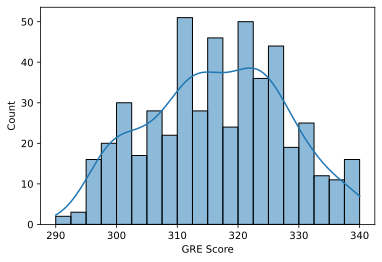

In [13]:
sns.histplot(data=data['GRE Score'],kde=True,bins=20)

<AxesSubplot:xlabel='TOEFL Score', ylabel='Count'>

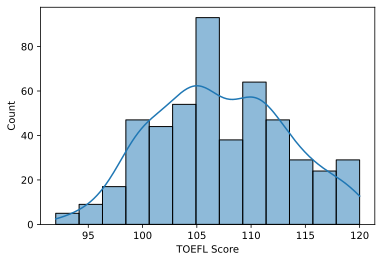

In [14]:
sns.histplot(data=data['TOEFL Score'],kde=True)

<AxesSubplot:xlabel='SOP', ylabel='Count'>

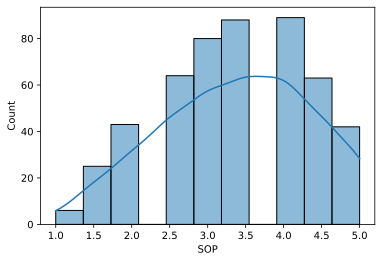

In [15]:
sns.histplot(data=data['SOP'],kde=True)

<AxesSubplot:xlabel='CGPA', ylabel='Count'>

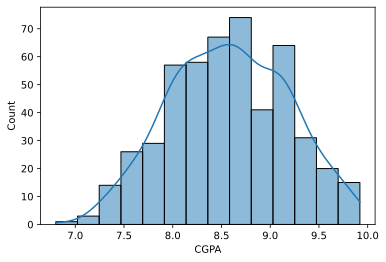

In [16]:
sns.histplot(data=data['CGPA'],kde=True)

> The historgram plot for these integer variables seems to be normally distributed.

<AxesSubplot:xlabel='Research', ylabel='count'>

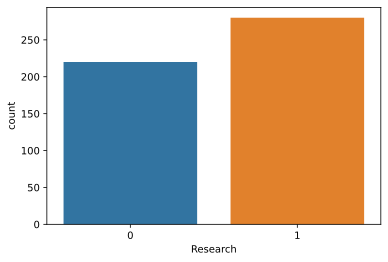

In [17]:
sns.countplot(data=data,x='Research')

> There are more research students than the non-searchers.

<AxesSubplot:xlabel='University Rating', ylabel='CGPA'>

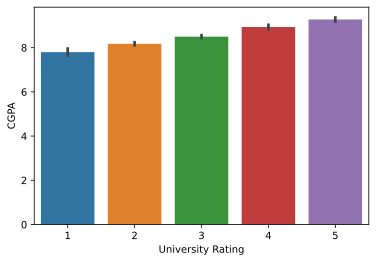

In [18]:
sns.barplot(data=data, x='University Rating', y='CGPA')

> More the CGPA, more it is likely to get highly rated university.

In [19]:
data.corr()

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Chance of Admit
GRE Score,1.000000,0.827200,0.613498,0.524679,0.825878,0.810351
TOEFL Score,0.827200,1.000000,0.644410,0.541563,0.810574,0.792228
SOP,0.613498,0.644410,1.000000,0.663707,0.712154,0.684137
LOR,0.524679,0.541563,0.663707,1.000000,0.637469,0.645365
CGPA,0.825878,0.810574,0.712154,0.637469,1.000000,0.882413
Chance of Admit,0.810351,0.792228,0.684137,0.645365,0.882413,1.000000


> CGPA seems to be most highly related with Chance of getting Admission, followedby GRE scores and TOEFL scores.

<AxesSubplot:xlabel='Research', ylabel='CGPA'>

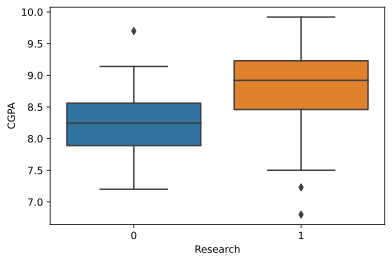

In [20]:
sns.boxplot(data=data,x='Research',y='CGPA')

> Students doing research work are more likely to get higher CGPA scores, and thus more chances of admit.

# Data Preprocessing
- Duplicate value check
- Missing value treatment
- Outlier treatment
- Feature engineering
- Data preparation for modeling

In [21]:
duplicateRows = data[data.duplicated()]
duplicateRows

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


> No duplicates found in the data.

In [22]:
pd.isnull(data).sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

> No null values in the data.

<AxesSubplot:xlabel='Research', ylabel='Chance of Admit'>

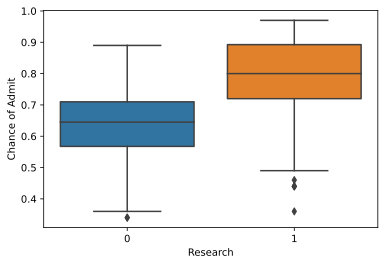

In [23]:
sns.boxplot(data=data,y='Chance of Admit',x='Research')

> As we can see there lies outliers, specially for Research-1. So, we can find a range using IQR which can be used to remvoe outliers from the data.

In [24]:
data_researcher=data.loc[data['Research']==1]['Chance of Admit']
data_researcher

0      0.92
1      0.76
2      0.72
3      0.80
5      0.90
       ... 
493    0.62
494    0.68
495    0.87
496    0.96
497    0.93
Name: Chance of Admit, Length: 280, dtype: float64

In [25]:
q1 = np.percentile(data_researcher, 25)
q3 = np.percentile(data_researcher, 75)

iqr = q3 - q1

upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr

lower_limit,upper_limit

(0.4612499999999998, 1.15125)

> Chance of Admit before 0.46 can be considered as outliers for students doing Research. Higher limit can maximium be 1 so, here calculated 1.15 higher limit won't be a applicable.

In [26]:
# Data preparation for model

# Separating dependent (Y) and Independent variables(X)

Y=data['Chance of Admit']
Y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [27]:
X=data[data.columns.drop('Chance of Admit')]
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


## Model building
- Build the Linear Regression model and comment on the model statistics
- Display model coefficients with column names
- Try out Ridge and Lasso regression


In [28]:
import statsmodels.api as sm

In [29]:
X = sm.add_constant(X)

C:\Users\amank\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [30]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
predictions   # predictions of using the model

0      0.951883
1      0.804031
2      0.653448
3      0.744519
4      0.631550
         ...   
495    0.837740
496    0.990314
497    0.948146
498    0.702650
499    0.822886
Length: 500, dtype: float64

In [31]:
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     324.4
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          8.21e-180
Time:                        15:47:04   Log-Likelihood:                 701.38
No. Observations:                 500   AIC:                            -1387.
Df Residuals:                     492   BIC:                            -1353.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2757      0.10

 > R square & Adjusted R square values seem be higher (near 1). So, it can be acceptable model.

In [32]:
# Model coeffecients with column name

model.params

const               -1.275725
GRE Score            0.001859
TOEFL Score          0.002778
University Rating    0.005941
SOP                  0.001586
LOR                  0.016859
CGPA                 0.118385
Research             0.024307
dtype: float64

In [33]:
# Ridge & lasso - method (elastic_net)

model_2 = sm.OLS(Y, X).fit_regularized(method='elastic_net', alpha=0.1,refit=True)
print_model_2=model_2.summary()
print(print_model_2)

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     190.7
Date:                Wed, 09 Aug 2023   Prob (F-statistic):           3.24e-62
Time:                        15:47:04   Log-Likelihood:                 412.19
No. Observations:                 500   AIC:                            -818.4
Df Residuals:                     498   BIC:                            -805.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                      0          

## Testing the assumptions of the linear regression model
- Multicollinearity check by VIF score (variables are dropped one-by-one till none has VIF>5)
- The mean of residuals is nearly zero
- Linearity of variables (no pattern in the residual plot)
- Test for Homoscedasticity
- Normality of residuals (almost bell-shaped curve in residuals distribution, points in QQ plot are almost all on the line)


In [34]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [35]:
vif = pd.DataFrame()
X_t = X
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,1511.50
6,CGPA,4.78
1,GRE Score,4.46
2,TOEFL Score,3.90
4,SOP,2.84
3,University Rating,2.62
5,LOR,2.03
7,Research,1.49


In [36]:
cols2 = vif['Features'][1:].values
X2 = X[cols2]

cols2 = vif["Features"][1:].values
X2 = X[cols2]

X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
sm_model = sm.OLS(Y, X2_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     324.4
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          8.21e-180
Time:                        15:47:04   Log-Likelihood:                 701.38
No. Observations:                 500   AIC:                            -1387.
Df Residuals:                     492   BIC:                            -1353.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2757      0.10

C:\Users\amank\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [37]:
# creating hypothesis function of linear regression model

def hypothesis(X,weight):
    return np.dot(X,weight)

In [38]:
weight=model.params

In [39]:
Y_hat = hypothesis(X,weight)
errors = Y_hat - Y

In [40]:
mean_of_residuals=sum(errors)/len(errors)
print("Means of Residuals", mean_of_residuals)

Means of Residuals 9.593437155785978e-16


> Means of residuals is very nearly 0

C:\Users\amank\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Predicted values vs Residuals')

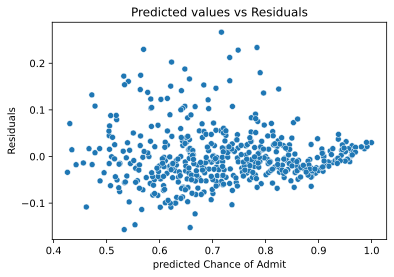

In [41]:
sns.scatterplot(Y_hat,errors)
plt.xlabel("predicted Chance of Admit")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")

> No Patterns observed in residual plot, which defines linearity of variables

In [42]:
# Test for Homoscedasticity

# In above plot of residual, when we go from left to right, there is not increase of errors.
# So, we can say that heteroskedasticity doesn't exist in our data.

Text(0.5, 1.0, 'Histogram of residuals')

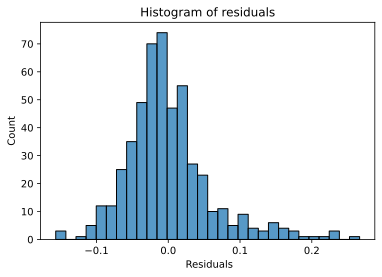

In [43]:
sns.histplot(errors)
plt.xlabel(" Residuals")
plt.title("Histogram of residuals")

> Residual histogram plot is almost bell-shaped, which is normally distributed.

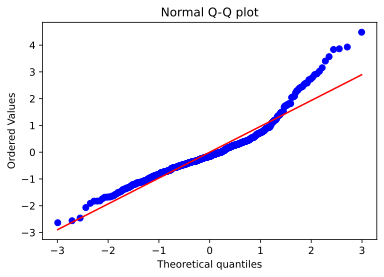

In [44]:
import scipy.stats as stats

observation = errors
  
z = (errors-np.mean(errors))/np.std(errors)
  
stats.probplot(z, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

> Almost all points lie on Q-Q plot, which tells us about normality of residuals.

## Model performance evaluation
- Metrics checked - MAE, RMSE, R2, Adj R2
- Train and test performances are checked
- Comments on the performance measures and if there is any need to improve the model or not

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

smfOLS = sm.OLS(y_train,X_train).fit()
print(smfOLS.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.0
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          3.41e-142
Time:                        15:47:05   Log-Likelihood:                 561.91
No. Observations:                 400   AIC:                            -1108.
Df Residuals:                     392   BIC:                            -1076.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.4214      0.12

In [46]:
smfOLS.mse_model

0.9247007940882425

In [47]:
predictions=smfOLS.predict(X_test)

In [48]:
def mae(y_true, prediction):
    y_true, prediction = np.array(y_true), np.array(prediction)
    return np.mean(np.abs(y_true - prediction))

print("Mean Absolute Error:", mae(y_test, predictions))

Mean Absolute Error: 0.04272265427705377


In [49]:
 def rmse(y_true, prediction):
    diff=np.subtract(y_true,prediction)
    square=np.square(diff)
    MSE=square.mean()
    return np.sqrt(MSE)

print("Root Mean Square Error:", rmse(y_test,predictions))

Root Mean Square Error: 0.060865880415782836


In [50]:
print("R-squared:", model.rsquared)
print("Adj. R-squared: ", model.rsquared_adj)

R-squared: 0.8219007395178417
Adj. R-squared:  0.8193668069500062


> With the train and test data splitted separately, MAE & RMSE values are very small, which signifies a good model and fit.

> Also, R-sqaure and Adjusted R squared values are higher, nealy 1.

##  Actionable Insights & Recommendations

- Variables like CGPA, GRA scores and TOEFL scores are highly correlated with chance of Admit, so they play higher significance for predicting the outcomes for the model
- For model improvement we can include more independent variables which have less correlations among themselves but highly realted to the predicted value, which is chance of admissions
- chance of admission can also depend on certain other factors like, location, visa processes, fees, etc which can brought from other data source and can be combined with the student performace data
- As we know, we need 80% of data to train the model, and this provided dataset was small (around 500), so including more data 
- R square value is 0.82 which is considered to be a very good value for this model in case of this use case of predicting the chance of admission and thus this can be considered as a good model